# EdStats Data Analysis

## OBJECTIVE:
- Which countries have a strong potential of customers for our services?
- For each of these countries, how will this customer potential evolve?
- In which countries should the company operate as a priority?

__Importing liberaries__

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Data

In [2]:
data = pd.read_csv('EdStatsData.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape # data dimension

(886930, 70)

__Checking indicarotr__

In [4]:
data.groupby('Indicator Name').count()

,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Adjusted net enrolment rate, lower secondary, both sexes (%)",242,242,242,4,29,29,25,29,22,27,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, female (%)",242,242,242,2,24,25,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",242,242,242,2,24,24,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, male (%)",242,242,242,2,24,24,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, primary, both sexes (%)",242,242,242,15,15,17,18,19,21,22,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Youth illiterate population, 15-24 years, male (number)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0
"Youth literacy rate, population 15-24 years, both sexes (%)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0
"Youth literacy rate, population 15-24 years, female (%)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0


We have 3665 indicators.

### Reading country data

In [5]:
data_country= pd.read_csv('EdStatsCountry.csv')
data_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [6]:
data_country.shape

(241, 32)

In [7]:
data_country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

## Data Cleaning

__Create a DF with contry_code, name, region and income_group__


In [8]:
countries_income = pd.DataFrame({"Region" : data_country["Region"],
                                 "Country Name" : data_country["Short Name"].unique(),  
                                 "Income_group" : data_country["Income Group"]})

countries_income

,Region,Country Name,Income_group
0,Latin America & Caribbean,Aruba,High income: nonOECD
1,South Asia,Afghanistan,Low income
2,Sub-Saharan Africa,Angola,Upper middle income
3,Europe & Central Asia,Albania,Upper middle income
4,Europe & Central Asia,Andorra,High income: nonOECD
...,...,...,...
236,Europe & Central Asia,Kosovo,Lower middle income
237,Middle East & North Africa,Yemen,Lower middle income
238,Sub-Saharan Africa,South Africa,Upper middle income
239,Sub-Saharan Africa,Zambia,Lower middle income


__Adding 2 data frames (data plus countries_income)__

In [9]:
data_p_country = pd.merge(data,countries_income, left_on='Country Name', right_on='Country Name')
data_p_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Region,Income_group
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Select interesting years from data_p_country__

In [10]:
data_p_country.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69', 'Region', 'Income_group'],
      dtype='object')

__Keeping the years from 2000 to 2020 for analysing data__

In [11]:
data_p_country_reduced = data_p_country.filter(items=['Region', 'Country Name', 'Country Code', 'Income_group', 
                                                      'Indicator Name', 'Indicator Code','2000', '2001', 
                                                       '2002', '2003', '2004', '2005','2006',
                                                       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                                                       '2015','2016', '2017','2020'])
data_p_country_reduced.shape

(776980, 25)

__Keeping the years from 2025 to 2100 for projection__

In [12]:
data_projections = data_p_country.filter(items=['Region', 'Country Name', 'Country Code', 'Income_group', 
                                        'Indicator Name', 'Indicator Code','2025', '2030', '2035', '2040', '2045',
                                        '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
                                        '2095', '2100'])
data_projections.shape

(776980, 22)

__Remove data with no value in Income_group__

In [13]:
data_p_country_reduced = data_p_country_reduced[data_p_country_reduced.Income_group.notnull()]
data_p_country_reduced.shape

(714675, 25)

Select Countries with __High income__

In [14]:
data_p_country_reduced.Income_group.unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [15]:
incomes_to_keep = ['High income: nonOECD', 'High income: OECD']
data_r_income = data_p_country_reduced[data_p_country_reduced.Income_group.isin(incomes_to_keep)]
data_r_income.shape

(249220, 25)

In [16]:
data_r_income['Income_group'].unique()

array(['High income: nonOECD', 'High income: OECD'], dtype=object)

### Selecte useful Indicators from "Indicator Code" feature

- Internet
- Education
- Population
- Economy

### INTERNET

- Internet users (per 100 people)(IT.NET.USER.P2)
- Personal computers (per 100 people)(IT.CMP.PCMP.P2)



In [17]:
data_r_internet = data_r_income.loc[(data_r_income['Indicator Code'] == "IT.NET.USER.P2")|
                                                (data_r_income['Indicator Code'] == "IT.CMP.PCMP.P2")] 
data_r_internet.shape

(136, 25)

In [18]:
data_r_internet.groupby('Indicator Name').count()

,Region,Country Name,Country Code,Income_group,Indicator Code,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Internet users (per 100 people),68,68,68,68,68,61,60,60,60,60,...,62,61,62,61,61,61,61,60,0,0
Personal computers (per 100 people),68,68,68,68,68,52,55,53,52,50,...,0,0,0,0,0,0,0,0,0,0


We almost have no data for PC, so we remove it.

__Just looking for the countries with Internet access__

In [19]:
data_r_internet = data_r_internet.loc[(data_r_income['Indicator Code'] == "IT.NET.USER.P2")] 
data_r_internet= data_r_internet.rename({"Country Code": "Country Code","Internet_PC": "Internet" },axis=1)

data_r_internet.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
71010,Europe & Central Asia,Andorra,AND,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,10.538836,NaN,11.260469,13.546413,...,78.53,81.00,81.000000,86.434425,94.000000,95.900000,96.910000,97.930637,NaN,NaN
78340,Latin America & Caribbean,Antigua and Barbuda,ATG,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,6.482226,8.899286,12.500000,17.228649,...,42.00,47.00,52.000000,58.000000,63.400000,67.780000,70.000000,73.000000,NaN,NaN
89335,Latin America & Caribbean,Aruba,ABW,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,15.442823,17.100000,18.800000,20.800000,...,58.00,62.00,69.000000,74.000000,78.900000,83.780000,88.661227,93.542454,NaN,NaN
93000,East Asia & Pacific,Australia,AUS,High income: OECD,Internet users (per 100 people),IT.NET.USER.P2,46.756116,52.689266,NaN,NaN,...,74.25,76.00,79.487698,79.000000,83.453497,84.000000,84.560519,88.238658,NaN,NaN
96665,Europe & Central Asia,Austria,AUT,High income: OECD,Internet users (per 100 people),IT.NET.USER.P2,33.730133,39.185450,36.560000,42.700000,...,73.45,75.17,78.739993,80.029994,80.618800,80.995825,83.940142,84.323331,NaN,NaN


In [20]:
data_r_internet.shape

(68, 25)

### Population

- Population, total(SP.POP.TOTL)
- Population, ages 15-24, total(SP.POP.1524.TO.UN)   
- School age population, tertiary education, both sexes (number)(SP.TER.TOTL.IN)
- Population, ages 15-64, total(SP.POP.1564.TO)

In [21]:
codes_to_keep = ['SP.POP.TOTL', 
                 'SP.POP.1524.TO.UN',
                 'SP.POP.1564.TO',
                 'SP.TER.TOTL.IN']
data_r_pop = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]


In [22]:
data_r_pop.shape

(272, 25)

In [23]:
data_r_pop.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Indicator Code,,,,,,,,,,,,,,,,,,,,,
SP.POP.1524.TO.UN,68,68,68,68,68,53,54,55,55,54,...,49,49,49,49,49,49,49,0,0,0
SP.POP.1564.TO,68,68,68,68,68,55,55,55,55,55,...,55,55,55,55,55,55,55,55,0,0
SP.POP.TOTL,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,66,66,66,0,0
SP.TER.TOTL.IN,68,68,68,68,68,52,51,51,52,52,...,52,51,51,51,49,52,38,0,0,0


In [24]:
codes_to_keep = ['SP.POP.1524.TO.UN',
                 'SP.TER.TOTL.IN']
data_r_pop = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

### Education

- Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary(BAR.TER.CMPT.15UP.ZS)
- Enrolment in tertiary education, all programmes, both sexes (number)(SE.TER.ENRL)

In [25]:
codes_to_keep = ['BAR.TER.CMPT.15UP.ZS', 
                 'SE.TER.ENRL']
data_r_edu = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

In [26]:
data_r_edu.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.TER.CMPT.15UP.ZS,68,68,68,68,68,46,0,0,0,0,...,0,46,0,0,0,0,0,0,0,0
SE.TER.ENRL,68,68,68,68,68,43,41,42,46,43,...,45,49,47,48,46,46,39,0,0,0


In [27]:
codes_to_keep = ['SE.TER.ENRL']
data_r_edu = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

### Expenditures on education

- GDP(gross domestic product) per capita based on purchasing power parity (PPP). (current international dollar)(NY.GDP.PCAP.PP.CD)
- GNI(gross national income) per capita based on purchasing power parity (PPP).GNI per capita, PPP (current international dollar)(NY.GNP.PCAP.PP.CD)

- Government expenditure on education as % of GDP (%)(SE.XPD.TOTL.GD.ZS)
- Expenditure on education as % of total government expenditure (%)(SE.XPD.TOTL.GB.ZS)


In [28]:
codes_to_keep = ['SE.XPD.TOTL.GD.ZS', 
                 'NY.GDP.PCAP.PP.CD',
                'SE.XPD.TOTL.GB.ZS',
                'NY.GNP.PCAP.PP.CD']
data_r_exp = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

In [29]:
data_r_exp.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Indicator Code,,,,,,,,,,,,,,,,,,,,,
NY.GDP.PCAP.PP.CD,68,68,68,68,68,53,53,53,53,53,...,53,53,55,53,53,51,51,49,0,0
NY.GNP.PCAP.PP.CD,68,68,68,68,68,49,50,50,50,51,...,52,52,52,52,52,50,50,46,0,0
SE.XPD.TOTL.GB.ZS,68,68,68,68,68,36,41,45,41,44,...,42,42,41,36,42,31,7,0,0,0
SE.XPD.TOTL.GD.ZS,68,68,68,68,68,37,42,46,42,46,...,43,43,43,36,43,32,9,0,0,0


In [30]:
codes_to_keep = ['SE.XPD.TOTL.GD.ZS', 
                 'NY.GDP.PCAP.PP.CD']
data_r_exp = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

### Demographics

__Internet__

- Internet users (per 100 people)(IT.NET.USER.P2)

__Population__

- Population, ages 15-24, total(SP.POP.1524.TO.UN)   
- School age population, tertiary education, both sexes (number)(SP.TER.TOTL.IN)

__Education__

- Enrolment in tertiary education, all programmes, both sexes in 2010 (number)(SE.TER.ENRL)

__Expenditures on education__
- 	Expenditure on education as % of total government expenditure (%)(SE.XPD.TOTL.GB.ZS)
- GDP per capita based on purchasing power parity (PPP)(current international dollar)(NY.GDP.PCAP.PP.CD)

In [31]:
indicators_to_keep = ['IT.NET.USER.P2',
                      
                      'SP.POP.1524.TO.UN', 
                      'SP.TER.TOTL.IN',
                      
                      'SE.TER.ENRL',
                                             
                      'NY.GDP.PCAP.PP.CD', 
                      'SE.XPD.TOTL.GB.ZS']
data_keep = data_r_income[data_r_income['Indicator Code'].isin(indicators_to_keep)]
data_keep.shape

(408, 25)

In [32]:
data_keep.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
70839,Europe & Central Asia,Andorra,AND,High income: nonOECD,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,267.000000,306.000000,...,NaN,NaN,NaN,491.000000,538.0,498.0,501.00,NaN,NaN,NaN
70859,Europe & Central Asia,Andorra,AND,High income: nonOECD,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70882,Europe & Central Asia,Andorra,AND,High income: nonOECD,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71010,Europe & Central Asia,Andorra,AND,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,10.538836,NaN,11.260469,13.546413,...,78.53,81.0,81.0,86.434425,94.0,95.9,96.91,97.930637,NaN,NaN
71961,Europe & Central Asia,Andorra,AND,High income: nonOECD,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__All the varible that we need are selected__

## Data Quality

<AxesSubplot:>

<Figure size 576x360 with 0 Axes>

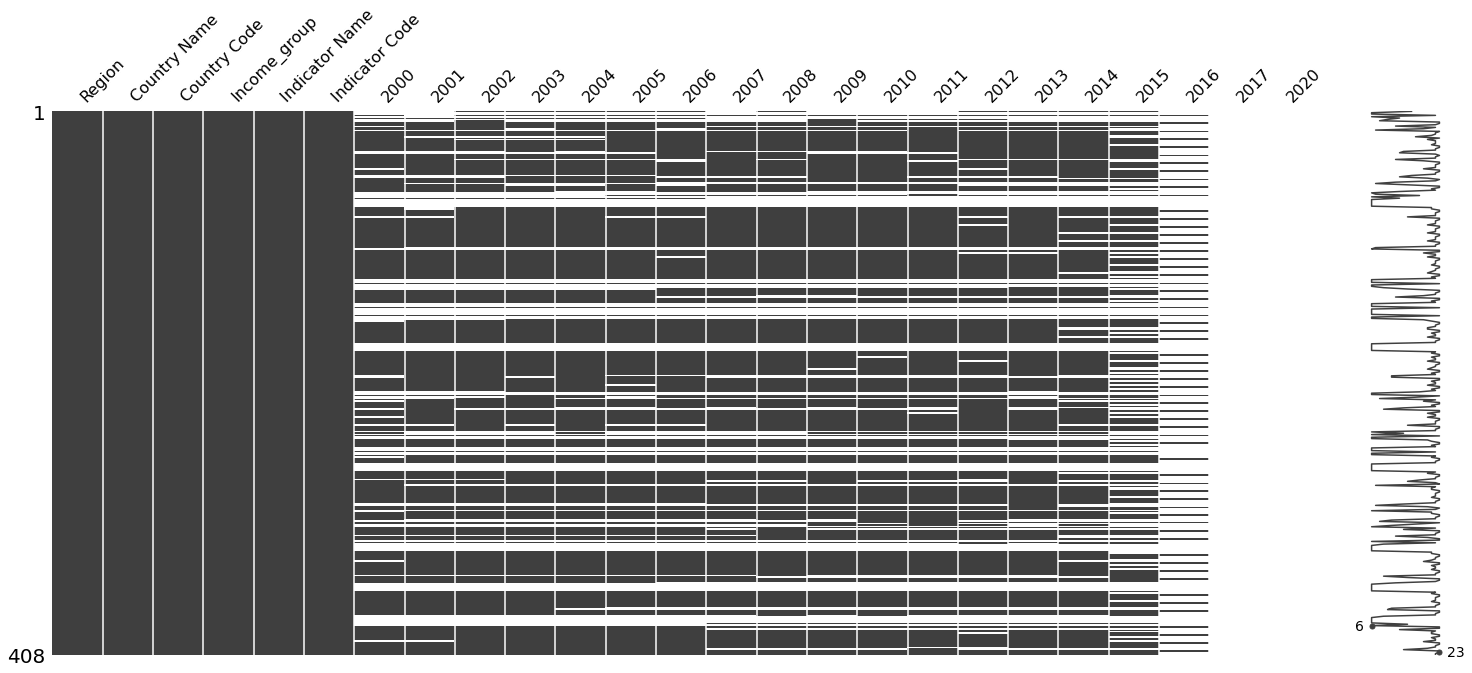

In [33]:
import missingno as msno
plt.figure(figsize=(8,5))
msno.matrix(data_keep)

In [34]:
data_keep.columns

Index(['Region', 'Country Name', 'Country Code', 'Income_group',
       'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2020'],
      dtype='object')

In [35]:
data_keep = data_keep.drop(['Region','Country Code', 'Income_group',
       'Indicator Name','2016','2017','2020'], axis=1)

In [36]:
data_keep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 70839 to 753807
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    408 non-null    object 
 1   Indicator Code  408 non-null    object 
 2   2000            298 non-null    float64
 3   2001            300 non-null    float64
 4   2002            306 non-null    float64
 5   2003            307 non-null    float64
 6   2004            306 non-null    float64
 7   2005            304 non-null    float64
 8   2006            303 non-null    float64
 9   2007            301 non-null    float64
 10  2008            305 non-null    float64
 11  2009            303 non-null    float64
 12  2010            305 non-null    float64
 13  2011            305 non-null    float64
 14  2012            298 non-null    float64
 15  2013            300 non-null    float64
 16  2014            290 non-null    float64
 17  2015            245 non-null

In [37]:
data_keep['2000'] = data_keep['2000'].fillna(data_keep['2000'].median())
data_keep['2001'] = data_keep['2001'].fillna(data_keep['2001'].median())
data_keep['2002'] = data_keep['2002'].fillna(data_keep['2002'].median())
data_keep['2003'] = data_keep['2003'].fillna(data_keep['2003'].median())
data_keep['2004'] = data_keep['2004'].fillna(data_keep['2004'].median())
data_keep['2005'] = data_keep['2005'].fillna(data_keep['2005'].median())
data_keep['2006'] = data_keep['2006'].fillna(data_keep['2006'].median())
data_keep['2007'] = data_keep['2007'].fillna(data_keep['2007'].median())
data_keep['2008'] = data_keep['2008'].fillna(data_keep['2008'].median())
data_keep['2009'] = data_keep['2009'].fillna(data_keep['2009'].median())
data_keep['2010'] = data_keep['2010'].fillna(data_keep['2010'].median())

data_keep['2011'] = data_keep['2011'].fillna(data_keep['2011'].median())
data_keep['2012'] = data_keep['2012'].fillna(data_keep['2012'].median())
data_keep['2013'] = data_keep['2013'].fillna(data_keep['2013'].median())
data_keep['2014'] = data_keep['2014'].fillna(data_keep['2014'].median())
data_keep['2015'] = data_keep['2015'].fillna(data_keep['2015'].median())
data_keep.head()

,Country Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
70839,Andorra,SE.TER.ENRL,26984.492441,27603.967476,267.000000,306.000000,331.000000,342.000000,401.000000,36436.51777,459.000000,37080.308255,35909.79915,39465.845937,491.000000,538.000000,498.000000,501.000000
70859,Andorra,SE.XPD.TOTL.GB.ZS,26984.492441,27603.967476,28427.676975,29079.551165,30761.464953,31815.960273,34256.910348,36436.51777,36257.512445,37080.308255,35909.79915,39465.845937,40174.468912,41962.295632,44514.185898,46866.547976
70882,Andorra,NY.GDP.PCAP.PP.CD,26984.492441,27603.967476,28427.676975,29079.551165,30761.464953,31815.960273,34256.910348,36436.51777,36257.512445,37080.308255,35909.79915,39465.845937,40174.468912,41962.295632,44514.185898,46866.547976
71010,Andorra,IT.NET.USER.P2,10.538836,27603.967476,11.260469,13.546413,26.837954,37.605766,48.936847,70.87000,70.040000,78.530000,81.00000,81.000000,86.434425,94.000000,95.900000,96.910000
71961,Andorra,SP.TER.TOTL.IN,26984.492441,27603.967476,28427.676975,29079.551165,30761.464953,31815.960273,34256.910348,36436.51777,36257.512445,37080.308255,35909.79915,39465.845937,40174.468912,41962.295632,44514.185898,46866.547976


Using pivot table to have a value of each indicators

In [38]:
pivot_data= data_keep.pivot_table(index=['Country Name'] ,columns=['Indicator Code'],values = '2015')          
pivot_data.head()

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1524.TO.UN,SP.TER.TOTL.IN
Country Name,,,,,,
Andorra,96.910000,46866.547976,501.000000,46866.547976,4.686655e+04,4.686655e+04
Antigua and Barbuda,70.000000,21503.952551,46866.547976,46866.547976,4.686655e+04,7.935000e+03
Aruba,88.661227,46866.547976,1166.000000,46866.547976,1.445500e+04,7.634000e+03
Australia,84.560519,46475.927752,46866.547976,46866.547976,2.914620e+06,1.602152e+06
Austria,83.940142,50087.731743,425971.687500,46866.547976,9.646290e+05,5.224050e+05


In [39]:
pivot_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, Andorra to Uruguay
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IT.NET.USER.P2     68 non-null     float64
 1   NY.GDP.PCAP.PP.CD  68 non-null     float64
 2   SE.TER.ENRL        68 non-null     float64
 3   SE.XPD.TOTL.GB.ZS  68 non-null     float64
 4   SP.POP.1524.TO.UN  68 non-null     float64
 5   SP.TER.TOTL.IN     68 non-null     float64
dtypes: float64(6)
memory usage: 3.7+ KB


In [40]:
#final_df=final_df.drop('SE.XPD.TOTL.GB.ZS', axis=1)

__Filling Missing Values__

In [41]:
#pivot_data['IT.NET.USER.P2']= pivot_data['IT.NET.USER.P2'].fillna(pivot_data['IT.NET.USER.P2'].median())

#final_df['NY.GDP.PCAP.PP.CD']= final_df['NY.GDP.PCAP.PP.CD'].fillna(final_df['NY.GDP.PCAP.PP.CD'].median())

#final_df['SE.TER.ENRL']= final_df['SE.TER.ENRL'].fillna(final_df['SE.TER.ENRL'].median())

#pivot_data['SE.XPD.TOTL.GB.ZS']= pivot_data['SE.XPD.TOTL.GB.ZS'].fillna(pivot_data['SE.XPD.TOTL.GB.ZS'].median())

#pivot_data['SP.POP.1524.TO.UN']= pivot_data['SP.POP.1524.TO.UN'].fillna(pivot_data['SP.POP.1524.TO.UN'].median())

#final_df['SP.TER.TOTL.IN']= final_df['SP.TER.TOTL.IN'].fillna(final_df['SP.TER.TOTL.IN'].median())

In [42]:
pivot_data.describe()

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1524.TO.UN,SP.TER.TOTL.IN
count,68.000000,68.000000,6.800000e+01,68.000000,6.800000e+01,6.800000e+01
mean,4896.093261,46244.328127,5.398264e+05,42043.445383,1.955255e+06,7.297328e+05
std,14323.362744,19585.770114,2.394157e+06,14343.642583,5.823374e+06,2.826118e+06
min,21.320000,17561.860344,1.940000e+02,7.660800,1.445500e+04,2.236000e+03
25%,73.129675,33880.468553,4.686655e+04,46866.547976,4.686655e+04,4.686655e+04
50%,82.031271,46866.547976,4.686655e+04,46866.547976,4.374740e+05,4.686655e+04
75%,92.221432,48070.945740,2.761682e+05,46866.547976,1.119206e+06,3.653360e+05
max,46866.547976,127764.462337,1.953173e+07,46866.547976,4.514752e+07,2.276537e+07


By checking this information is clear that there exists some countries with incorrect data.

In [43]:
pivot_data.value_counts('IT.NET.USER.P2')

IT.NET.USER.P2
46866.547976    7
71.715900       1
77.634700       1
77.600132       1
77.523269       1
               ..
84.694500       1
84.560519       1
83.940142       1
80.122400       1
21.320000       1
Length: 62, dtype: int64

#### List of 7 countries with incorrect data

In [44]:
pp= pivot_data.sort_values(by=['IT.NET.USER.P2'], ascending=False)
pp=pp[(pp['IT.NET.USER.P2']> 100)]
pp

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1524.TO.UN,SP.TER.TOTL.IN
Country Name,,,,,,
Turks and Caicos Islands,46866.547976,46866.547976,286.000000,46866.547976,46866.547976,46866.547976
Northern Mariana Islands,46866.547976,46866.547976,46866.547976,46866.547976,46866.547976,46866.547976
Isle of Man,46866.547976,46866.547976,46866.547976,46866.547976,46866.547976,46866.547976
San Marino,46866.547976,60145.460932,46866.547976,46866.547976,46866.547976,46866.547976
Sint Maarten (Dutch part),46866.547976,46866.547976,194.000000,46866.547976,46866.547976,46866.547976
St. Martin (French part),46866.547976,46866.547976,46866.547976,46866.547976,46866.547976,46866.547976
Channel Islands,46866.547976,46866.547976,46866.547976,46866.547976,46866.547976,46866.547976


Actually theses countries are not so much interesting for our project because the population is not enough.

Now just keeping the countries with __high population in age 15-24 in 2015.__

In [45]:
data_sort = pivot_data.sort_values(by=['SP.POP.1524.TO.UN'], ascending=False)
coun_h_pop_15_24 = data_sort[(data_sort['SP.POP.1524.TO.UN'] > 800000)]
coun_h_pop_15_24.head()

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1524.TO.UN,SP.TER.TOTL.IN
Country Name,,,,,,
United States,74.554202,56469.008969,1.953173e+07,46866.547976,45147517.0,2.276537e+07
Japan,91.058028,40686.024386,4.686655e+04,46866.547976,12157426.0,4.686655e+04
Germany,87.589800,48170.263465,2.977781e+06,46866.547976,8682394.0,4.362053e+06
United Kingdom,92.000300,42124.651892,4.686655e+04,13.880240,7731522.0,4.686655e+04
France,84.694500,41178.141819,4.686655e+04,46866.547976,7567872.0,4.686655e+04


### To merge

Merge pivot_table with data_keep to have a DataFrame with all years & selected indicators.

In [46]:
final_df = pd.merge(coun_h_pop_15_24, data_keep, on="Country Name") 

In [47]:
final_df.head()

,Country Name,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1524.TO.UN,SP.TER.TOTL.IN,Indicator Code,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,United States,74.554202,56469.008969,19531728.0,46866.547976,45147517.0,22765372.0,SE.TER.ENRL,1.320288e+07,1.359558e+07,...,1.748748e+07,1.775887e+07,1.824812e+07,1.910281e+07,2.042771e+07,2.101613e+07,2.099411e+07,1.997262e+07,1.970022e+07,1.953173e+07
1,United States,74.554202,56469.008969,19531728.0,46866.547976,45147517.0,22765372.0,SE.XPD.TOTL.GB.ZS,2.698449e+04,2.760397e+04,...,1.515830e+01,1.454073e+01,1.397610e+01,1.288782e+01,1.305514e+01,1.293341e+01,1.338630e+01,1.328636e+01,1.454820e+01,4.686655e+04
2,United States,74.554202,56469.008969,19531728.0,46866.547976,45147517.0,22765372.0,NY.GDP.PCAP.PP.CD,3.644986e+04,3.727362e+04,...,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,4.837388e+04,4.979067e+04,5.145012e+04,5.278703e+04,5.459855e+04,5.646901e+04
3,United States,74.554202,56469.008969,19531728.0,46866.547976,45147517.0,22765372.0,IT.NET.USER.P2,4.307916e+01,4.908083e+01,...,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,7.169000e+01,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.455420e+01
4,United States,74.554202,56469.008969,19531728.0,46866.547976,45147517.0,22765372.0,SP.TER.TOTL.IN,1.937716e+07,1.970941e+07,...,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,2.167902e+07,2.181852e+07,2.213582e+07,2.248952e+07,2.273174e+07,2.276537e+07


In [48]:
final_df.shape

(132, 24)

__Check and remove duplicated data__

In [49]:
final_df.duplicated(subset=['Country Name','IT.NET.USER.P2']).sum()

110

In [50]:
final_df.drop_duplicates(subset=['Country Name','IT.NET.USER.P2'],keep='last', inplace=True)

In [51]:
final_df.shape

(22, 24)

In [52]:
final_df.head(20)

,Country Name,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1524.TO.UN,SP.TER.TOTL.IN,Indicator Code,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5,United States,74.554202,56469.008969,1.953173e+07,46866.547976,45147517.0,2.276537e+07,SP.POP.1524.TO.UN,39234056.0,39908939.0,...,43388523.0,43962362.0,44459126.0,44855382.0,45137089.0,45296141.0,45343097.0,45307415.0,45230846.0,45147517.0
11,Japan,91.058028,40686.024386,4.686655e+04,46866.547976,12157426.0,4.686655e+04,SP.POP.1524.TO.UN,16099722.0,15642234.0,...,13759822.0,13425972.0,13119358.0,12853503.0,12637132.0,12472916.0,12355023.0,12272803.0,12211081.0,12157426.0
17,Germany,87.589800,48170.263465,2.977781e+06,46866.547976,8682394.0,4.362053e+06,SP.POP.1524.TO.UN,9162837.0,9279469.0,...,9769678.0,9722427.0,9630837.0,9514498.0,9388651.0,9255162.0,9111578.0,8964066.0,8819364.0,8682394.0
23,United Kingdom,92.000300,42124.651892,4.686655e+04,13.880240,7731522.0,4.686655e+04,SP.POP.1524.TO.UN,7162142.0,7259790.0,...,7936414.0,8000333.0,8034786.0,8044972.0,8035314.0,8005514.0,7955051.0,7888589.0,7812258.0,7731522.0
29,France,84.694500,41178.141819,4.686655e+04,46866.547976,7567872.0,4.686655e+04,SP.POP.1524.TO.UN,7669903.0,7677498.0,...,7780124.0,7753063.0,7713805.0,7672082.0,7635485.0,7604177.0,7576981.0,7558568.0,7554426.0,7567872.0
35,Italy,58.141735,37407.163565,1.826477e+06,46866.547976,5703349.0,2.922547e+06,SP.POP.1524.TO.UN,6686087.0,6478609.0,...,5895784.0,5858088.0,5837995.0,5824835.0,5810621.0,5792098.0,5770157.0,5746139.0,5723105.0,5703349.0
41,Saudi Arabia,69.616236,54118.737375,1.527769e+06,46866.547976,5298036.0,2.422484e+06,SP.POP.1524.TO.UN,3934937.0,4047732.0,...,4471152.0,4592624.0,4719966.0,4841702.0,4949474.0,5041764.0,5121282.0,5189035.0,5247247.0,5298036.0
47,Poland,67.997000,26856.834376,4.686655e+04,46866.547976,4404280.0,2.587832e+06,SP.POP.1524.TO.UN,6507892.0,6514774.0,...,6074620.0,5903644.0,5714890.0,5517987.0,5320615.0,5126961.0,4938116.0,4754886.0,4576845.0,4404280.0
53,Canada,88.470000,44204.946582,4.686655e+04,46866.547976,4373511.0,4.686655e+04,SP.POP.1524.TO.UN,4128100.0,4168509.0,...,4382683.0,4423895.0,4459623.0,4485153.0,4497200.0,4494958.0,4479644.0,4452709.0,4416539.0,4373511.0
59,Spain,78.689600,34836.942239,1.963924e+06,46866.547976,4285743.0,2.190165e+06,SP.POP.1524.TO.UN,5847843.0,5724883.0,...,5129793.0,4991360.0,4853275.0,4723383.0,4607799.0,4508216.0,4424474.0,4358495.0,4311934.0,4285743.0


In [53]:
final_df=final_df.drop('Indicator Code', axis=1)

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 5 to 131
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       22 non-null     object 
 1   IT.NET.USER.P2     22 non-null     float64
 2   NY.GDP.PCAP.PP.CD  22 non-null     float64
 3   SE.TER.ENRL        22 non-null     float64
 4   SE.XPD.TOTL.GB.ZS  22 non-null     float64
 5   SP.POP.1524.TO.UN  22 non-null     float64
 6   SP.TER.TOTL.IN     22 non-null     float64
 7   2000               22 non-null     float64
 8   2001               22 non-null     float64
 9   2002               22 non-null     float64
 10  2003               22 non-null     float64
 11  2004               22 non-null     float64
 12  2005               22 non-null     float64
 13  2006               22 non-null     float64
 14  2007               22 non-null     float64
 15  2008               22 non-null     float64
 16  2009               22 non-n

#### Now we have a clean data so we can do analysis

## Data Analysis

In [55]:
final_df.columns

Index(['Country Name', 'IT.NET.USER.P2', 'NY.GDP.PCAP.PP.CD', 'SE.TER.ENRL',
       'SE.XPD.TOTL.GB.ZS', 'SP.POP.1524.TO.UN', 'SP.TER.TOTL.IN', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [56]:
final_df = final_df.round({'IT.NET.USER.P2': 2, 'SE.XPD.TOTL.GB.ZS': 2})
final_df.head(10)

,Country Name,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1524.TO.UN,SP.TER.TOTL.IN,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5,United States,74.55,56469.008969,1.953173e+07,46866.55,45147517.0,2.276537e+07,39234056.0,39908939.0,40626820.0,...,43388523.0,43962362.0,44459126.0,44855382.0,45137089.0,45296141.0,45343097.0,45307415.0,45230846.0,45147517.0
11,Japan,91.06,40686.024386,4.686655e+04,46866.55,12157426.0,4.686655e+04,16099722.0,15642234.0,15223627.0,...,13759822.0,13425972.0,13119358.0,12853503.0,12637132.0,12472916.0,12355023.0,12272803.0,12211081.0,12157426.0
17,Germany,87.59,48170.263465,2.977781e+06,46866.55,8682394.0,4.362053e+06,9162837.0,9279469.0,9423919.0,...,9769678.0,9722427.0,9630837.0,9514498.0,9388651.0,9255162.0,9111578.0,8964066.0,8819364.0,8682394.0
23,United Kingdom,92.00,42124.651892,4.686655e+04,13.88,7731522.0,4.686655e+04,7162142.0,7259790.0,7398785.0,...,7936414.0,8000333.0,8034786.0,8044972.0,8035314.0,8005514.0,7955051.0,7888589.0,7812258.0,7731522.0
29,France,84.69,41178.141819,4.686655e+04,46866.55,7567872.0,4.686655e+04,7669903.0,7677498.0,7706168.0,...,7780124.0,7753063.0,7713805.0,7672082.0,7635485.0,7604177.0,7576981.0,7558568.0,7554426.0,7567872.0
35,Italy,58.14,37407.163565,1.826477e+06,46866.55,5703349.0,2.922547e+06,6686087.0,6478609.0,6304349.0,...,5895784.0,5858088.0,5837995.0,5824835.0,5810621.0,5792098.0,5770157.0,5746139.0,5723105.0,5703349.0
41,Saudi Arabia,69.62,54118.737375,1.527769e+06,46866.55,5298036.0,2.422484e+06,3934937.0,4047732.0,4132836.0,...,4471152.0,4592624.0,4719966.0,4841702.0,4949474.0,5041764.0,5121282.0,5189035.0,5247247.0,5298036.0
47,Poland,68.00,26856.834376,4.686655e+04,46866.55,4404280.0,2.587832e+06,6507892.0,6514774.0,6487992.0,...,6074620.0,5903644.0,5714890.0,5517987.0,5320615.0,5126961.0,4938116.0,4754886.0,4576845.0,4404280.0
53,Canada,88.47,44204.946582,4.686655e+04,46866.55,4373511.0,4.686655e+04,4128100.0,4168509.0,4210387.0,...,4382683.0,4423895.0,4459623.0,4485153.0,4497200.0,4494958.0,4479644.0,4452709.0,4416539.0,4373511.0
59,Spain,78.69,34836.942239,1.963924e+06,46866.55,4285743.0,2.190165e+06,5847843.0,5724883.0,5610702.0,...,5129793.0,4991360.0,4853275.0,4723383.0,4607799.0,4508216.0,4424474.0,4358495.0,4311934.0,4285743.0


In [57]:
final_df.shape

(22, 23)

## Rank the countries

In [58]:
 
final_df_copy = final_df.copy()
final_df_copy['INT_rank'] = final_df_copy['IT.NET.USER.P2'].rank()
final_df_copy['GDP_rank'] = final_df_copy['NY.GDP.PCAP.PP.CD'].rank()
final_df_copy['EDU_rank'] = final_df_copy['SE.TER.ENRL'].rank()
final_df_copy['pop_1524_rank'] = final_df_copy['SP.POP.1524.TO.UN'].rank()
final_df_copy['POP_rank'] = final_df_copy['SP.TER.TOTL.IN'].rank()

final_df_copy['TOT_rank'] = final_df_copy.iloc[:, [-5,-4,-3,-2,-1]].sum(axis=1)
final_df_copy.head()

,Country Name,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1524.TO.UN,SP.TER.TOTL.IN,2000,2001,2002,...,2012,2013,2014,2015,INT_rank,GDP_rank,EDU_rank,pop_1524_rank,POP_rank,TOT_rank
5,United States,74.55,56469.008969,1.953173e+07,46866.55,45147517.0,2.276537e+07,39234056.0,39908939.0,40626820.0,...,45343097.0,45307415.0,45230846.0,45147517.0,7.0,20.0,22.0,22.0,22.0,93.0
11,Japan,91.06,40686.024386,4.686655e+04,46866.55,12157426.0,4.686655e+04,16099722.0,15642234.0,15223627.0,...,12355023.0,12272803.0,12211081.0,12157426.0,20.0,9.0,4.0,21.0,3.5,57.5
17,Germany,87.59,48170.263465,2.977781e+06,46866.55,8682394.0,4.362053e+06,9162837.0,9279469.0,9423919.0,...,9111578.0,8964066.0,8819364.0,8682394.0,17.0,16.0,21.0,20.0,21.0,95.0
23,United Kingdom,92.00,42124.651892,4.686655e+04,13.88,7731522.0,4.686655e+04,7162142.0,7259790.0,7398785.0,...,7955051.0,7888589.0,7812258.0,7731522.0,22.0,11.0,4.0,19.0,3.5,59.5
29,France,84.69,41178.141819,4.686655e+04,46866.55,7567872.0,4.686655e+04,7669903.0,7677498.0,7706168.0,...,7576981.0,7558568.0,7554426.0,7567872.0,13.0,10.0,4.0,18.0,3.5,48.5


In [59]:
final_df_copy= final_df_copy.sort_values(by =['TOT_rank'],ascending=False)

Text(0.5, 1.0, 'Total Rank')

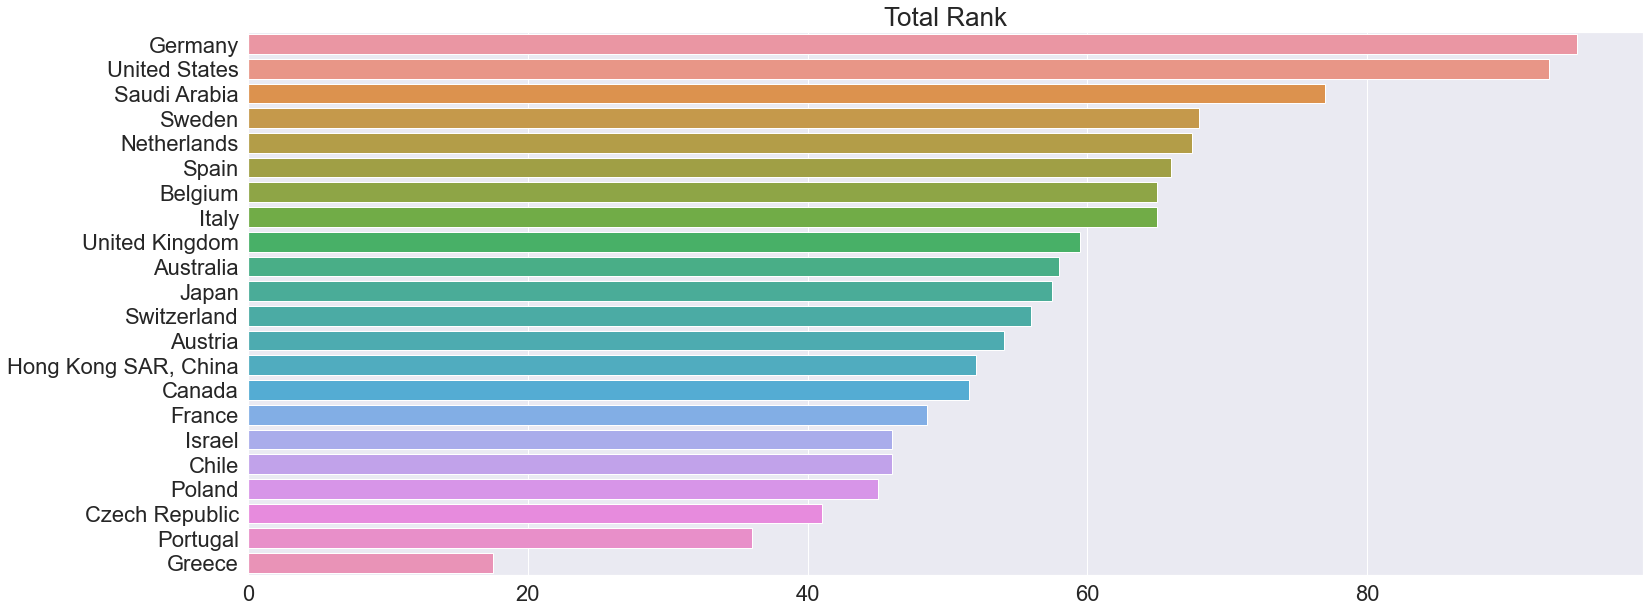

In [60]:
sns.set(font_scale=2.0)
plt.figure(figsize=(25,10))

sns.barplot(data=final_df_copy, y="Country Name", x="TOT_rank")
plt.xlabel('')
plt.ylabel('')
plt.title("Total Rank", fontsize=26)

#### Evolution in selected countries

### Population age 15-24

In [61]:
final_df_copy['Country Name'].unique()

array(['Germany', 'United States', 'Saudi Arabia', 'Sweden',
       'Netherlands', 'Spain', 'Belgium', 'Italy', 'United Kingdom',
       'Australia', 'Japan', 'Switzerland', 'Austria',
       'Hong Kong SAR, China', 'Canada', 'France', 'Israel', 'Chile',
       'Poland', 'Czech Republic', 'Portugal', 'Greece'], dtype=object)

In [62]:
data_keep.columns

Index(['Country Name', 'Indicator Code', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015'],
      dtype='object')

In [63]:
indicators_to_keep = ['SE.TER.ENRL']
data_p_edu = data_keep[data_keep['Indicator Code'].isin(indicators_to_keep)]

In [64]:
Countries_to_keep = ['Germany', 'United States', 'Saudi Arabia', 'Sweden',
       'Netherlands', 'Spain', 'Belgium', 'Italy', 'United Kingdom']

data_p_edu_years = data_p_edu[data_p_edu['Country Name'].isin(Countries_to_keep)]
data_p_edu_years = data_p_edu_years.drop('Indicator Code', axis=1)
data_p_edu_years = data_p_edu_years.rename(columns={'Country Name':'Country'})
data_p_edu_years.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
118484,Belgium,3.557480e+05,3.592650e+05,3.669820e+05,3.745320e+05,3.861100e+05,3.895470e+05,3.944270e+05,3.936870e+05,4.016520e+05,4.252190e+05,4.453090e+05,4.624190e+05,4.777120e+05,4.884880e+05,4.959100e+05,504745.0
283409,Germany,2.698449e+04,2.760397e+04,2.842768e+04,2.907955e+04,3.076146e+04,3.181596e+04,3.425691e+04,3.643652e+04,3.625751e+04,3.708031e+04,3.590980e+04,3.946585e+04,4.017447e+04,2.780013e+06,2.912204e+06,2977781.0
364039,Italy,1.770002e+06,1.812325e+06,1.854200e+06,1.913352e+06,1.986497e+06,2.014998e+06,2.029023e+06,2.033642e+06,2.013856e+06,2.011713e+06,1.980399e+06,1.967569e+06,1.925930e+06,1.872693e+06,1.854360e+06,1826477.0
510639,Netherlands,4.876490e+05,5.040420e+05,5.167690e+05,5.267670e+05,5.433960e+05,5.649830e+05,5.796220e+05,5.901210e+05,6.022860e+05,6.185020e+05,6.509050e+05,7.800140e+05,7.936780e+05,4.196230e+04,4.451419e+04,842601.0
598599,Saudi Arabia,4.040940e+05,4.323480e+05,4.448000e+05,5.253440e+05,5.738030e+05,6.037710e+05,6.364450e+05,6.744120e+05,7.148770e+05,7.577700e+05,9.035670e+05,1.021288e+06,1.206007e+06,1.356602e+06,1.496730e+06,1527769.0


In [65]:
data_p_edu_years = data_p_edu_years.set_index('Country')
data_p_edu_years

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Belgium,3.557480e+05,3.592650e+05,3.669820e+05,3.745320e+05,3.861100e+05,3.895470e+05,3.944270e+05,3.936870e+05,4.016520e+05,4.252190e+05,4.453090e+05,4.624190e+05,4.777120e+05,4.884880e+05,4.959100e+05,5.047450e+05
Germany,2.698449e+04,2.760397e+04,2.842768e+04,2.907955e+04,3.076146e+04,3.181596e+04,3.425691e+04,3.643652e+04,3.625751e+04,3.708031e+04,3.590980e+04,3.946585e+04,4.017447e+04,2.780013e+06,2.912204e+06,2.977781e+06
Italy,1.770002e+06,1.812325e+06,1.854200e+06,1.913352e+06,1.986497e+06,2.014998e+06,2.029023e+06,2.033642e+06,2.013856e+06,2.011713e+06,1.980399e+06,1.967569e+06,1.925930e+06,1.872693e+06,1.854360e+06,1.826477e+06
Netherlands,4.876490e+05,5.040420e+05,5.167690e+05,5.267670e+05,5.433960e+05,5.649830e+05,5.796220e+05,5.901210e+05,6.022860e+05,6.185020e+05,6.509050e+05,7.800140e+05,7.936780e+05,4.196230e+04,4.451419e+04,8.426010e+05
Saudi Arabia,4.040940e+05,4.323480e+05,4.448000e+05,5.253440e+05,5.738030e+05,6.037710e+05,6.364450e+05,6.744120e+05,7.148770e+05,7.577700e+05,9.035670e+05,1.021288e+06,1.206007e+06,1.356602e+06,1.496730e+06,1.527769e+06
Spain,1.828987e+06,1.833527e+06,1.832760e+06,1.840607e+06,1.839903e+06,1.809353e+06,1.789254e+06,1.777498e+06,1.781019e+06,1.800834e+06,1.878973e+06,1.950482e+06,1.965829e+06,1.969413e+06,1.982162e+06,1.963924e+06
Sweden,3.468780e+05,3.580200e+05,3.828510e+05,4.146570e+05,4.296230e+05,4.267230e+05,4.226140e+05,4.137100e+05,4.068790e+05,4.225800e+05,4.550250e+05,4.635300e+05,4.533280e+05,4.366030e+05,4.294440e+05,4.285570e+05
United Kingdom,2.024138e+06,2.067349e+06,2.240680e+06,2.287833e+06,2.247441e+06,2.287541e+06,2.336111e+06,2.362815e+06,2.329494e+06,2.415222e+06,2.479197e+06,2.492284e+06,2.495779e+06,2.386199e+06,2.352933e+06,4.686655e+04
United States,1.320288e+07,1.359558e+07,1.592799e+07,1.661171e+07,1.690047e+07,1.727204e+07,1.748748e+07,1.775887e+07,1.824812e+07,1.910281e+07,2.042771e+07,2.101613e+07,2.099411e+07,1.997262e+07,1.970022e+07,1.953173e+07


In [66]:
data_p_edu_years = data_p_edu_years.transpose()
data_p_edu_years = data_p_edu_years.round(2)
data_p_edu_years.head(10)

Country,Belgium,Germany,Italy,Netherlands,Saudi Arabia,Spain,Sweden,United Kingdom,United States
2000,355748.0,26984.49,1770002.0,487649.0,404094.0,1828987.0,346878.0,2024138.0,13202880.0
2001,359265.0,27603.97,1812325.0,504042.0,432348.0,1833527.0,358020.0,2067349.0,13595580.0
2002,366982.0,28427.68,1854200.0,516769.0,444800.0,1832760.0,382851.0,2240680.0,15927987.0
2003,374532.0,29079.55,1913352.0,526767.0,525344.0,1840607.0,414657.0,2287833.0,16611711.0
2004,386110.0,30761.46,1986497.0,543396.0,573803.0,1839903.0,429623.0,2247441.0,16900472.0
2005,389547.0,31815.96,2014998.0,564983.0,603771.0,1809353.0,426723.0,2287541.0,17272044.0
2006,394427.0,34256.91,2029023.0,579622.0,636445.0,1789254.0,422614.0,2336111.0,17487476.0
2007,393687.0,36436.52,2033642.0,590121.0,674412.0,1777498.0,413710.0,2362815.0,17758870.0
2008,401652.0,36257.51,2013856.0,602286.0,714877.0,1781019.0,406879.0,2329494.0,18248124.0
2009,425219.0,37080.31,2011713.0,618502.0,757770.0,1800834.0,422580.0,2415222.0,19102814.0


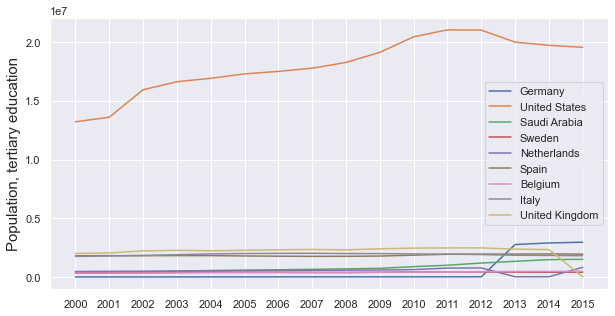

In [67]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10,5))
for country in Countries_to_keep:
    sns.lineplot(data=data_p_edu_years,
                 x=data_p_edu_years.index,
                 y=country,
                 label=country)
plt.ylabel('Population, tertiary education', fontsize=15);

### Internet users

In [68]:
indicators_to_keep = ['IT.NET.USER.P2']
data_p_internet = data_keep[data_keep['Indicator Code'].isin(indicators_to_keep)]

In [69]:
Countries_to_keep = ['Germany', 'United States', 'Saudi Arabia', 'Sweden',
       'Netherlands', 'Spain', 'Belgium', 'Italy', 'United Kingdom']

data_p_internet = data_p_internet[data_p_internet['Country Name'].isin(Countries_to_keep)]
data_p_internet = data_p_internet.drop([ 'Indicator Code'], axis=1)
data_p_internet = data_p_internet.rename(columns={'Country Name':'Country'})
data_p_internet.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
118655,Belgium,29.431692,31.288396,46.330000,49.970000,53.860000,55.820000,59.720000,64.44,66.00,70.00,75.00,81.609996,80.719991,82.1702,85.000000,85.052900
283580,Germany,30.216347,31.650939,48.820000,55.900000,64.730000,68.710000,72.160000,75.16,78.00,79.00,82.00,81.270000,82.349998,84.1700,86.190000,87.589800
364210,Italy,23.110874,27.222117,28.040000,29.040000,33.240000,35.000000,37.990000,40.79,44.53,48.83,53.68,54.389998,55.829998,58.4593,55.638460,58.141735
510810,Netherlands,43.984351,49.373062,61.290000,64.350000,68.520000,81.000000,83.700000,85.82,87.42,89.63,90.72,91.419996,92.859992,93.9564,91.666666,91.724138
598770,Saudi Arabia,2.210692,4.681053,6.384705,8.001583,10.234533,12.705036,19.459554,30.00,36.00,38.00,41.00,47.500000,54.000000,60.5000,64.713657,69.616236


In [70]:
data_p_internet = data_p_internet.set_index('Country')
data_p_internet

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Belgium,29.431692,31.288396,46.330000,49.970000,53.860000,55.820000,59.720000,64.44,66.00,70.00,75.00,81.609996,80.719991,82.1702,85.000000,85.052900
Germany,30.216347,31.650939,48.820000,55.900000,64.730000,68.710000,72.160000,75.16,78.00,79.00,82.00,81.270000,82.349998,84.1700,86.190000,87.589800
Italy,23.110874,27.222117,28.040000,29.040000,33.240000,35.000000,37.990000,40.79,44.53,48.83,53.68,54.389998,55.829998,58.4593,55.638460,58.141735
Netherlands,43.984351,49.373062,61.290000,64.350000,68.520000,81.000000,83.700000,85.82,87.42,89.63,90.72,91.419996,92.859992,93.9564,91.666666,91.724138
Saudi Arabia,2.210692,4.681053,6.384705,8.001583,10.234533,12.705036,19.459554,30.00,36.00,38.00,41.00,47.500000,54.000000,60.5000,64.713657,69.616236
Spain,13.624961,18.148723,20.390000,39.930000,44.010000,47.880000,50.370000,55.11,59.60,62.40,65.80,67.089999,69.810000,71.6350,76.190000,78.689600
Sweden,45.687652,51.765665,70.570000,79.130000,83.890000,84.830000,87.760000,82.01,90.00,91.00,90.00,92.769986,93.179988,94.7836,92.520000,90.610200
United Kingdom,26.821754,33.481095,56.480000,64.820000,65.610000,70.000000,68.820000,75.09,78.39,83.56,85.00,85.379999,87.479998,89.8441,91.610000,92.000300
United States,43.079163,49.080832,58.785404,61.697117,64.758256,67.968053,68.931193,75.00,74.00,71.00,71.69,69.729461,74.700000,71.4000,73.000000,74.554202


In [71]:
data_p_internet_years = data_p_internet.transpose()
data_p_internet_years = data_p_internet_years.round(2)
data_p_internet_years.head()

Country,Belgium,Germany,Italy,Netherlands,Saudi Arabia,Spain,Sweden,United Kingdom,United States
2000,29.43,30.22,23.11,43.98,2.21,13.62,45.69,26.82,43.08
2001,31.29,31.65,27.22,49.37,4.68,18.15,51.77,33.48,49.08
2002,46.33,48.82,28.04,61.29,6.38,20.39,70.57,56.48,58.79
2003,49.97,55.90,29.04,64.35,8.00,39.93,79.13,64.82,61.70
2004,53.86,64.73,33.24,68.52,10.23,44.01,83.89,65.61,64.76


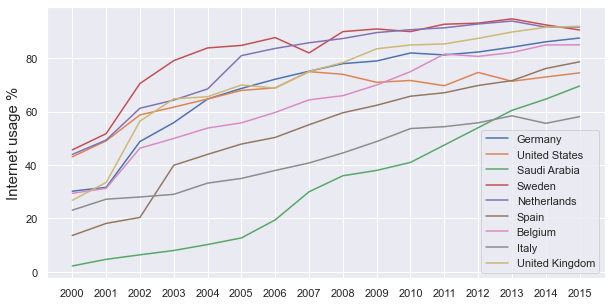

In [72]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10,5))
for country in Countries_to_keep:
    sns.lineplot(data=data_p_internet_years,
                 x=data_p_internet_years.index,
                 y=country,
                 label=country)
plt.ylabel('Internet usage %', fontsize=15);

#### GDP

In [73]:
indicators_to_keep = ['NY.GDP.PCAP.PP.CD']
data_p_GDP = data_keep[data_keep['Indicator Code'].isin(indicators_to_keep)]

In [74]:
Countries_to_keep = ['Germany', 'United States', 'Saudi Arabia', 'Sweden',
       'Netherlands', 'Spain', 'Belgium', 'Italy', 'United Kingdom']

data_p_GDP_years = data_p_GDP[data_p_GDP['Country Name'].isin(Countries_to_keep)]
data_p_GDP_years = data_p_GDP_years.drop(['Indicator Code'], axis=1)
data_p_GDP_years = data_p_GDP_years.rename(columns={'Country Name':'Country'})
data_p_GDP_years.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
118527,Belgium,27966.938804,29024.951645,30482.784651,31054.588625,32260.751298,33332.331350,35406.633634,36858.139853,38133.501464,38047.688180,40129.371378,41248.725342,42354.631485,43519.777920,44737.907196,45629.352069
283452,Germany,27277.110328,28541.243871,29326.912073,29988.213386,31439.582730,31968.467447,34261.473648,36436.517770,38028.772144,37080.308255,39263.187791,42692.519757,43564.148017,45232.197853,47195.602948,48170.263465
364082,Italy,27006.397113,27996.731471,28641.558148,29079.551165,29468.159284,30051.773267,32350.577103,33983.152649,35402.916853,34549.276477,35075.752775,36347.342478,36237.110428,36131.132112,36294.072505,37407.163565
510682,Netherlands,31572.678033,32912.257988,33991.059285,33701.440312,35440.763322,37265.345088,40620.759652,43462.049050,45843.892234,44090.325185,44585.526226,46066.652406,46707.269708,48666.317852,49012.021795,50054.194363
598642,Saudi Arabia,34139.657863,33621.697926,32262.660553,35550.277192,38293.235427,40547.134467,41782.544086,42520.355019,44841.929318,43055.810690,44502.419307,48524.632488,50573.390648,51264.866149,52626.017196,54118.737375


In [75]:
data_p_GDP_years = data_p_GDP_years.set_index('Country')
data_p_GDP_years

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Belgium,27966.938804,29024.951645,30482.784651,31054.588625,32260.751298,33332.331350,35406.633634,36858.139853,38133.501464,38047.688180,40129.371378,41248.725342,42354.631485,43519.777920,44737.907196,45629.352069
Germany,27277.110328,28541.243871,29326.912073,29988.213386,31439.582730,31968.467447,34261.473648,36436.517770,38028.772144,37080.308255,39263.187791,42692.519757,43564.148017,45232.197853,47195.602948,48170.263465
Italy,27006.397113,27996.731471,28641.558148,29079.551165,29468.159284,30051.773267,32350.577103,33983.152649,35402.916853,34549.276477,35075.752775,36347.342478,36237.110428,36131.132112,36294.072505,37407.163565
Netherlands,31572.678033,32912.257988,33991.059285,33701.440312,35440.763322,37265.345088,40620.759652,43462.049050,45843.892234,44090.325185,44585.526226,46066.652406,46707.269708,48666.317852,49012.021795,50054.194363
Saudi Arabia,34139.657863,33621.697926,32262.660553,35550.277192,38293.235427,40547.134467,41782.544086,42520.355019,44841.929318,43055.810690,44502.419307,48524.632488,50573.390648,51264.866149,52626.017196,54118.737375
Spain,21517.329636,22963.378418,24363.014919,25054.491493,26198.583596,27702.464307,30832.970754,32584.255376,33463.654099,32424.142612,31984.806226,32068.270927,31988.253869,32603.905771,33683.967693,34836.942239
Sweden,29257.985257,29701.997421,30587.762515,31470.895743,33551.705582,33967.187527,37439.837033,40563.838797,41853.696181,39693.325297,41667.832085,43755.060439,44724.974345,45673.170632,46404.743791,48037.839831
United Kingdom,26229.849394,27502.728107,28806.888838,30044.255969,31744.022253,32436.879588,34516.056960,35281.646495,36257.512445,34631.120725,35909.799150,36607.981090,37705.594223,39308.134566,41034.919149,42124.651892
United States,36449.855116,37273.618103,38166.037841,39677.198348,41921.809762,44307.920585,46437.067117,48061.537661,48401.427340,47001.555350,48373.878816,49790.665478,51450.122295,52787.026949,54598.550689,56469.008969


In [76]:
data_p_GDP_years = data_p_GDP_years.transpose()
data_p_GDP_years = data_p_GDP_years.round(2)
data_p_GDP_years.head()

Country,Belgium,Germany,Italy,Netherlands,Saudi Arabia,Spain,Sweden,United Kingdom,United States
2000,27966.94,27277.11,27006.40,31572.68,34139.66,21517.33,29257.99,26229.85,36449.86
2001,29024.95,28541.24,27996.73,32912.26,33621.70,22963.38,29702.00,27502.73,37273.62
2002,30482.78,29326.91,28641.56,33991.06,32262.66,24363.01,30587.76,28806.89,38166.04
2003,31054.59,29988.21,29079.55,33701.44,35550.28,25054.49,31470.90,30044.26,39677.20
2004,32260.75,31439.58,29468.16,35440.76,38293.24,26198.58,33551.71,31744.02,41921.81


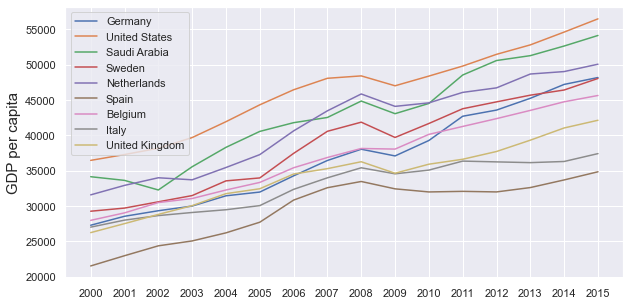

In [77]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10,5))
for country in Countries_to_keep:
    sns.lineplot(data=data_p_GDP_years,
                 x=data_p_GDP_years.index,
                 y=country,
                 label=country)
plt.ylabel('GDP per capita', fontsize=15);

### PROJECTIONS

In [78]:
data_projections.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2025,2030,2035,2040,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

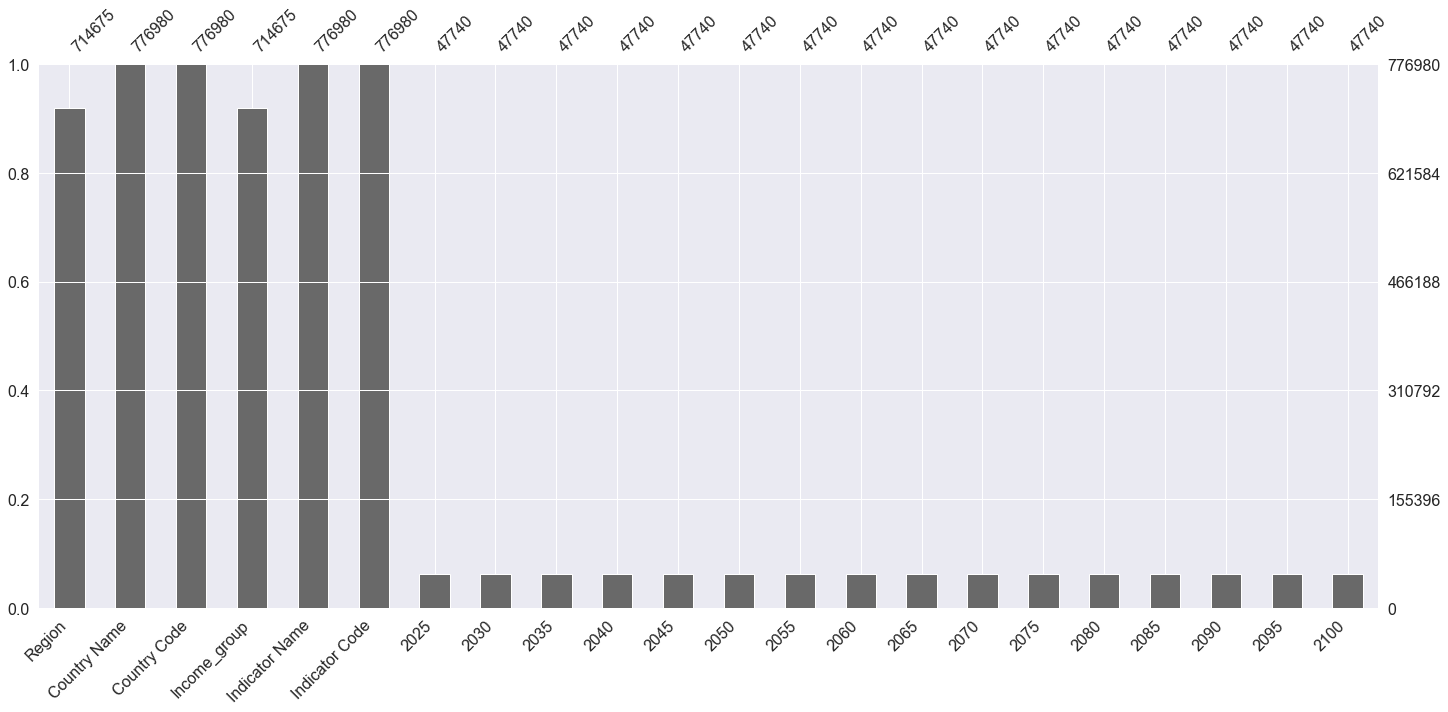

In [79]:
msno.bar(data_projections)

In [80]:
data_projections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776980 entries, 0 to 776979
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          714675 non-null  object 
 1   Country Name    776980 non-null  object 
 2   Country Code    776980 non-null  object 
 3   Income_group    714675 non-null  object 
 4   Indicator Name  776980 non-null  object 
 5   Indicator Code  776980 non-null  object 
 6   2025            47740 non-null   float64
 7   2030            47740 non-null   float64
 8   2035            47740 non-null   float64
 9   2040            47740 non-null   float64
 10  2045            47740 non-null   float64
 11  2050            47740 non-null   float64
 12  2055            47740 non-null   float64
 13  2060            47740 non-null   float64
 14  2065            47740 non-null   float64
 15  2070            47740 non-null   float64
 16  2075            47740 non-null   float64
 17  2080      

__Not enough data so making sample__

In [81]:
data_proj_sample = data_projections[data_projections['2025'].notnull()]


In [82]:
data_proj_sample.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2025,2030,2035,2040,2045,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Indicator Code,,,,,,,,,,,,,,,,,,,,,
PRJ.ATT.1519.1.FE,154,155,155,154,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
PRJ.ATT.1519.1.MA,154,155,155,154,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
PRJ.ATT.1519.1.MF,154,155,155,154,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
PRJ.ATT.1519.2.FE,154,155,155,154,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
PRJ.ATT.1519.2.MA,154,155,155,154,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRJ.POP.ALL.NED.MA,154,155,155,154,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
PRJ.POP.ALL.NED.MF,154,155,155,154,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
PRJ.POP.ALL.S1.FE,154,155,155,154,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155


308 indicators.

In [83]:
data_proj_sample['Country Name'].describe()

count       47740
unique        155
top       Ireland
freq          308
Name: Country Name, dtype: object

In [84]:
data_proj_sample['Indicator Code'].unique()

array(['PRJ.MYS.0T19.FE', 'PRJ.MYS.0T19.MA', 'PRJ.MYS.0T19.MF',
       'PRJ.MYS.15UP.FE', 'PRJ.MYS.15UP.GPI', 'PRJ.MYS.15UP.MA',
       'PRJ.MYS.15UP.MF', 'PRJ.MYS.1519.FE', 'PRJ.MYS.1519.MA',
       'PRJ.MYS.1519.MF', 'PRJ.MYS.2024.FE', 'PRJ.MYS.2024.MA',
       'PRJ.MYS.2024.MF', 'PRJ.MYS.2039.FE', 'PRJ.MYS.2039.MA',
       'PRJ.MYS.2039.MF', 'PRJ.MYS.2064.FE', 'PRJ.MYS.2064.MA',
       'PRJ.MYS.2064.MF', 'PRJ.MYS.25UP.FE', 'PRJ.MYS.25UP.GPI',
       'PRJ.MYS.25UP.MA', 'PRJ.MYS.25UP.MF', 'PRJ.MYS.2529.FE',
       'PRJ.MYS.2529.MA', 'PRJ.MYS.2529.MF', 'PRJ.MYS.4064.FE',
       'PRJ.MYS.4064.MA', 'PRJ.MYS.4064.MF', 'PRJ.MYS.60UP.FE',
       'PRJ.MYS.60UP.MA', 'PRJ.MYS.60UP.MF', 'PRJ.MYS.65UP.FE',
       'PRJ.MYS.65UP.MA', 'PRJ.MYS.65UP.MF', 'PRJ.MYS.80UP.FE',
       'PRJ.MYS.80UP.MA', 'PRJ.MYS.80UP.MF', 'PRJ.ATT.15UP.S1.FE',
       'PRJ.ATT.15UP.S1.MA', 'PRJ.ATT.15UP.S1.MF', 'PRJ.ATT.15UP.2.FE',
       'PRJ.ATT.15UP.2.MA', 'PRJ.ATT.15UP.2.MF', 'PRJ.ATT.15UP.NED.FE',
       'PRJ.ATT.15U

__CONCLUSIONS:__ there's projection data only for Wittegenstein Projection indicators (2025 - 2100) on education from topic attainment.

- Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total(PRJ.ATT.1519.3.MF)
- Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Total(PRJ.ATT.1519.2.MF)

In [92]:
indicators_to_keep = ['PRJ.ATT.1519.2.MF']
data_proj_l_s= data_proj_sample[data_proj_sample['Indicator Code'].isin(indicators_to_keep)]

In [91]:
Countries_to_keep = ['Germany', 'United States', 'Saudi Arabia', 'Sweden', 'Netherlands', 'Spain', 
                     'Belgium', 'Italy', 'United Kingdom', 'Australia', 'Japan', 'Switzerland', 
                     'Austria', 'Hong Kong SAR, China', 'Canada', 'France', 'Israel', 'Chile',
                     'Poland', 'Czech Republic', 'Portugal', 'Greece']
data_proj_l_s = data_proj_l_s[data_proj_l_s['Country Name'].isin(Countries_to_keep)]

data_proj_l_s = data_proj_l_s.drop(['Indicator Code', 'Country Code', 'Indicator Name', 'Region',
                                                      'Income_group'], axis=1)
data_proj_l_s = data_proj_l_s.rename(columns={'Country Name':'Country'})
data_proj_l_s = data_proj_l_s.set_index('Country')
data_proj_l_s = data_proj_l_s.transpose()
data_proj_l_s.head()

Country,Australia,Austria,Belgium,Canada,Chile,Czech Republic,France,Germany,Greece,"Hong Kong SAR, China",...,Japan,Netherlands,Poland,Portugal,Saudi Arabia,Spain,Sweden,Switzerland,United Kingdom,United States
2025,0.68,0.22,0.41,0.71,0.43,0.47,0.54,0.09,0.49,0.46,...,0.28,0.28,0.27,0.18,0.20,0.32,0.19,0.13,0.21,0.34
2030,0.70,0.23,0.43,0.72,0.45,0.48,0.57,0.09,0.52,0.48,...,0.29,0.29,0.29,0.19,0.21,0.34,0.19,0.14,0.22,0.35
2035,0.71,0.24,0.44,0.73,0.48,0.49,0.59,0.09,0.53,0.50,...,0.29,0.30,0.30,0.20,0.21,0.35,0.20,0.15,0.23,0.36
2040,0.73,0.25,0.45,0.74,0.51,0.50,0.61,0.09,0.55,0.52,...,0.30,0.32,0.31,0.21,0.22,0.37,0.20,0.16,0.24,0.37
2045,0.74,0.26,0.46,0.75,0.53,0.51,0.63,0.10,0.56,0.53,...,0.30,0.33,0.33,0.23,0.23,0.38,0.21,0.17,0.25,0.38


In [94]:
indicators_to_keep = ['PRJ.ATT.1519.3.MF']
data_proj_u_s = data_proj_sample[data_proj_sample['Indicator Code'].isin(indicators_to_keep)]

In [95]:
Countries_to_keep = ['Germany', 'United States', 'Saudi Arabia', 'Sweden', 'Netherlands', 'Spain', 
                     'Belgium', 'Italy', 'United Kingdom', 'Australia', 'Japan', 'Switzerland', 
                     'Austria', 'Hong Kong SAR, China', 'Canada', 'France', 'Israel', 'Chile',
                     'Poland', 'Czech Republic', 'Portugal', 'Greece']
data_proj_u_s = data_proj_u_s[data_proj_u_s['Country Name'].isin(Countries_to_keep)]

data_proj_u_s = data_proj_u_s.drop(['Indicator Code', 'Country Code', 'Indicator Name', 'Region',
                                                      'Income_group'], axis=1)
data_proj_u_s = data_proj_u_s.rename(columns={'Country Name':'Country'})
data_proj_u_s = data_proj_u_s.set_index('Country')
data_proj_u_s = data_proj_u_s.transpose()
data_proj_u_s.head()

Country,Australia,Austria,Belgium,Canada,Chile,Czech Republic,France,Germany,Greece,"Hong Kong SAR, China",...,Japan,Netherlands,Poland,Portugal,Saudi Arabia,Spain,Sweden,Switzerland,United Kingdom,United States
2025,0.68,0.22,0.41,0.71,0.43,0.47,0.54,0.09,0.49,0.46,...,0.28,0.28,0.27,0.18,0.20,0.32,0.19,0.13,0.21,0.34
2030,0.70,0.23,0.43,0.72,0.45,0.48,0.57,0.09,0.52,0.48,...,0.29,0.29,0.29,0.19,0.21,0.34,0.19,0.14,0.22,0.35
2035,0.71,0.24,0.44,0.73,0.48,0.49,0.59,0.09,0.53,0.50,...,0.29,0.30,0.30,0.20,0.21,0.35,0.20,0.15,0.23,0.36
2040,0.73,0.25,0.45,0.74,0.51,0.50,0.61,0.09,0.55,0.52,...,0.30,0.32,0.31,0.21,0.22,0.37,0.20,0.16,0.24,0.37
2045,0.74,0.26,0.46,0.75,0.53,0.51,0.63,0.10,0.56,0.53,...,0.30,0.33,0.33,0.23,0.23,0.38,0.21,0.17,0.25,0.38


ValueError: Could not interpret value `Germany` for parameter `y`

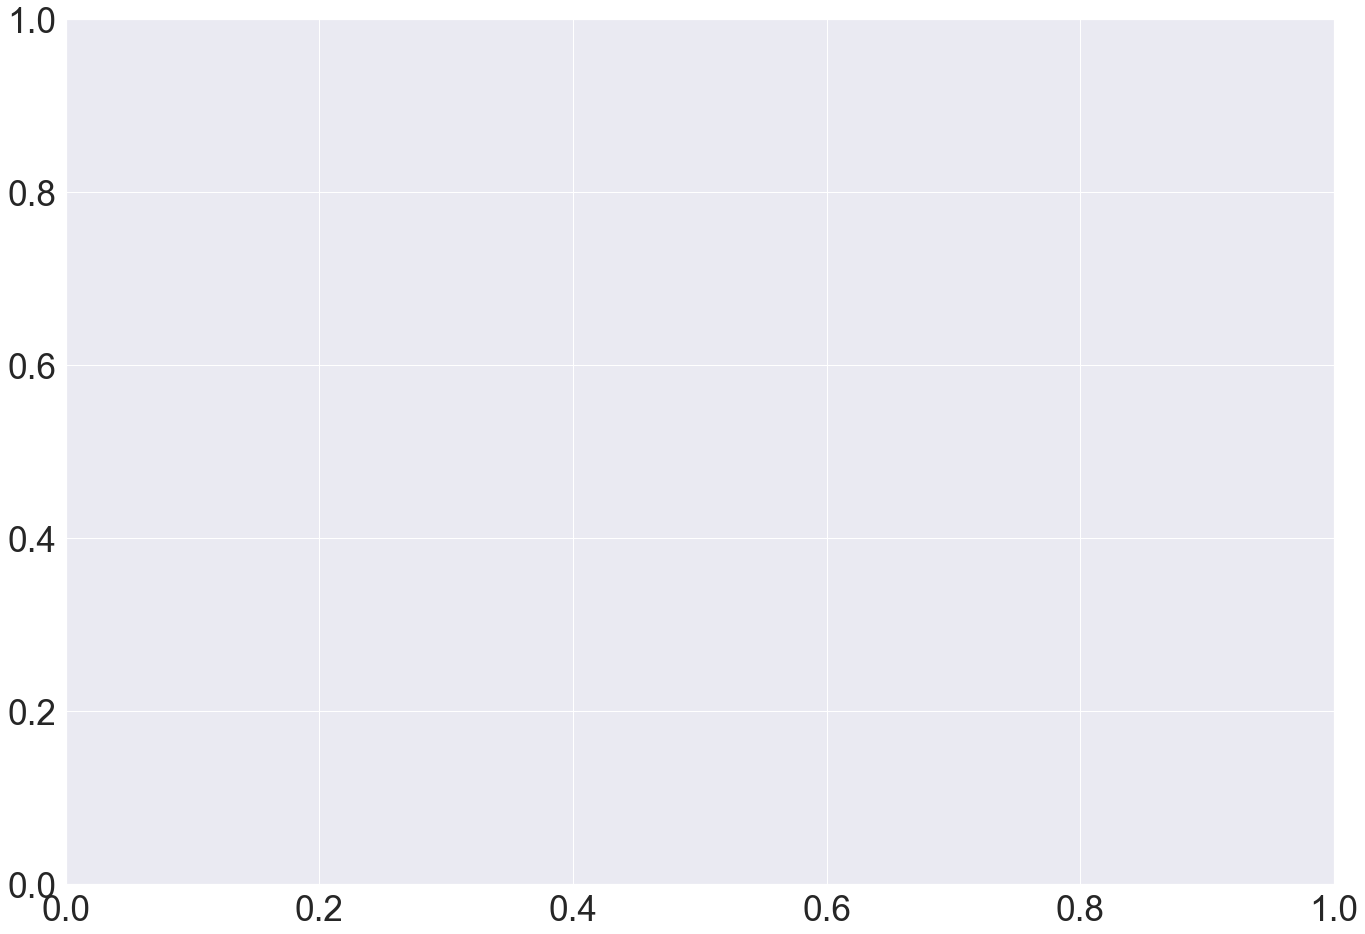

In [96]:
sns.set(font_scale=3.2)
plt.figure(figsize=(50,35))
plt.subplot(2,2,1)
for country in Countries_to_keep:
    sns.lineplot(data=data_proj_l_s,
                 x=data_proj_l_s.index,
                 y=country,
                 label=country)
plt.ylabel('Lower Secondary max attained, age 15-19 (%)');

plt.subplot(2,2,2)
for country in Countries_to_keep:
    sns.lineplot(data=data_proj_u_s,
                 x=data_proj_u_s.index,
                 y=country,
                 label=country)
plt.ylabel('Upper Secondary max attained, age 15-19 (%)');
